In [1]:
# import libs
import sys
import argparse
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

# plot specgram, if --make_plots
#def plot_specgram(signal_data, sampling_frequency,outfilestub):
def plot_specgram(signal_data, sampling_frequency):

    # Plot the signal read from wav file
    plt.figure(figsize=(16, 8), dpi=300)

    plt.title('Spectrogram of a wav file for Morse code')
    spectrum,freqs,t,d = plt.specgram(signal_data[1:],Fs=sampling_frequency,scale='dB',cmap='Spectral')
    plt.xlabel('Time')
    plt.ylim(0,5000)
    plt.ylabel('Frequency')
    return(spectrum,freqs,t)
    #plt.savefig(outfilestub + '_specgram.png')

# plot the FFT, if --make_plots
#def plot_fft(sound, sampling_freq, outfilestub):
def plot_fft(sound, sampling_freq):
    fft_spectrum = np.fft.rfft(sound)
    freq = np.fft.rfftfreq(sound.size, d=1./sampling_freq)
    fft_spectrum_abs = np.abs(fft_spectrum)
    plt.figure(figsize=(16, 5), dpi=300)
    plt.plot(freq[freq<1500], fft_spectrum_abs[freq<1500])
    print('peak frequency is at: {:.2f} Hz.'.format(freq[np.where(fft_spectrum_abs == np.amax(fft_spectrum_abs))[0]][0]))
 
    plt.xlabel("frequency, Hz")
    plt.ylabel("Amplitude, units")
    plt.ylim(0,1.1*fft_spectrum_abs[freq>0].max())
    plt.xlim(0,1500)
    #plt.savefig(outfilestub + '_fft.png')

# output some diagnostic plot of the waveform
#def plot_start(starttime,time,sound,outfilestub,title):
def plot_waves(time,sound,title):
    plt.figure(figsize=(16, 5), dpi=300)
    plt.plot(time, sound)
    plt.title(title)
    #plt.savefig(outfilestub + '_start_waves_short.png')


# output some diagnostic plot of the waveform
def plot_start(starttime,time,sound,title):
    newvec = (time>starttime) & (time<(starttime+0.02))
    plt.figure(figsize=(16, 5), dpi=300)
    plt.plot(time[newvec], sound[newvec])
    plt.title(title)
    
# return data vector and sample rate from wav
def return_data_from_wav(input_file):

    wav = wavfile.read(input_file)
    samplerate = wav[0]
    data = wav[1]
    sound = ''
    # assuming mono, if stereo deciding which channel
    # note: there is a potential weakness; if mute channel
    # has still lots of noise it could be inadvertently selected
    # this needs some work to make full-proof. 
    if len(data.shape) == 2:
           maxsignal1 = data[:,0].max()
           maxsignal2 = data[:,1].max()
           if maxsignal1 >= maxsignal2:
               sound = data[:,0]
           else:
               sound = data[:,1]
    elif len(data.shape) == 1:
        sound = data
    maxsignal = sound.max()
    minsignal = sound.min()
    
    if minsignal >= 0:
        sound2 = list()
        for value in sound:
            sound2.append(value - int(0.5*maxsignal)+1)
        sound = np.array(sound2)
        minsignal = sound.min()
        maxsignal = sound.max()
    length = sound.shape[0] / samplerate # aantal seconden
    time = np.linspace(0., length, sound.shape[0])
    return sound,maxsignal,minsignal,time,samplerate

In [13]:
sound,maxsignal,minsignal,time,samplerate = return_data_from_wav("Morse_les_2.wav")


In [ ]:
! ls Morse_cursus/Music/
! ffmpeg -i Morse_cursus/Music/Morse\ les\ 01.mp3 Morse_les_01.wav


In [ ]:
sound,maxsignal,minsignal,time,samplerate = return_data_from_wav("testing123_script.wav")


In [11]:
print(maxsignal)
print(samplerate)
print(time)
print(sound)

10052
44100
[0.00000000e+00 2.26757387e-05 4.53514773e-05 ... 3.00904444e+02
 3.00904467e+02 3.00904490e+02]
[0 0 0 ... 0 0 0]


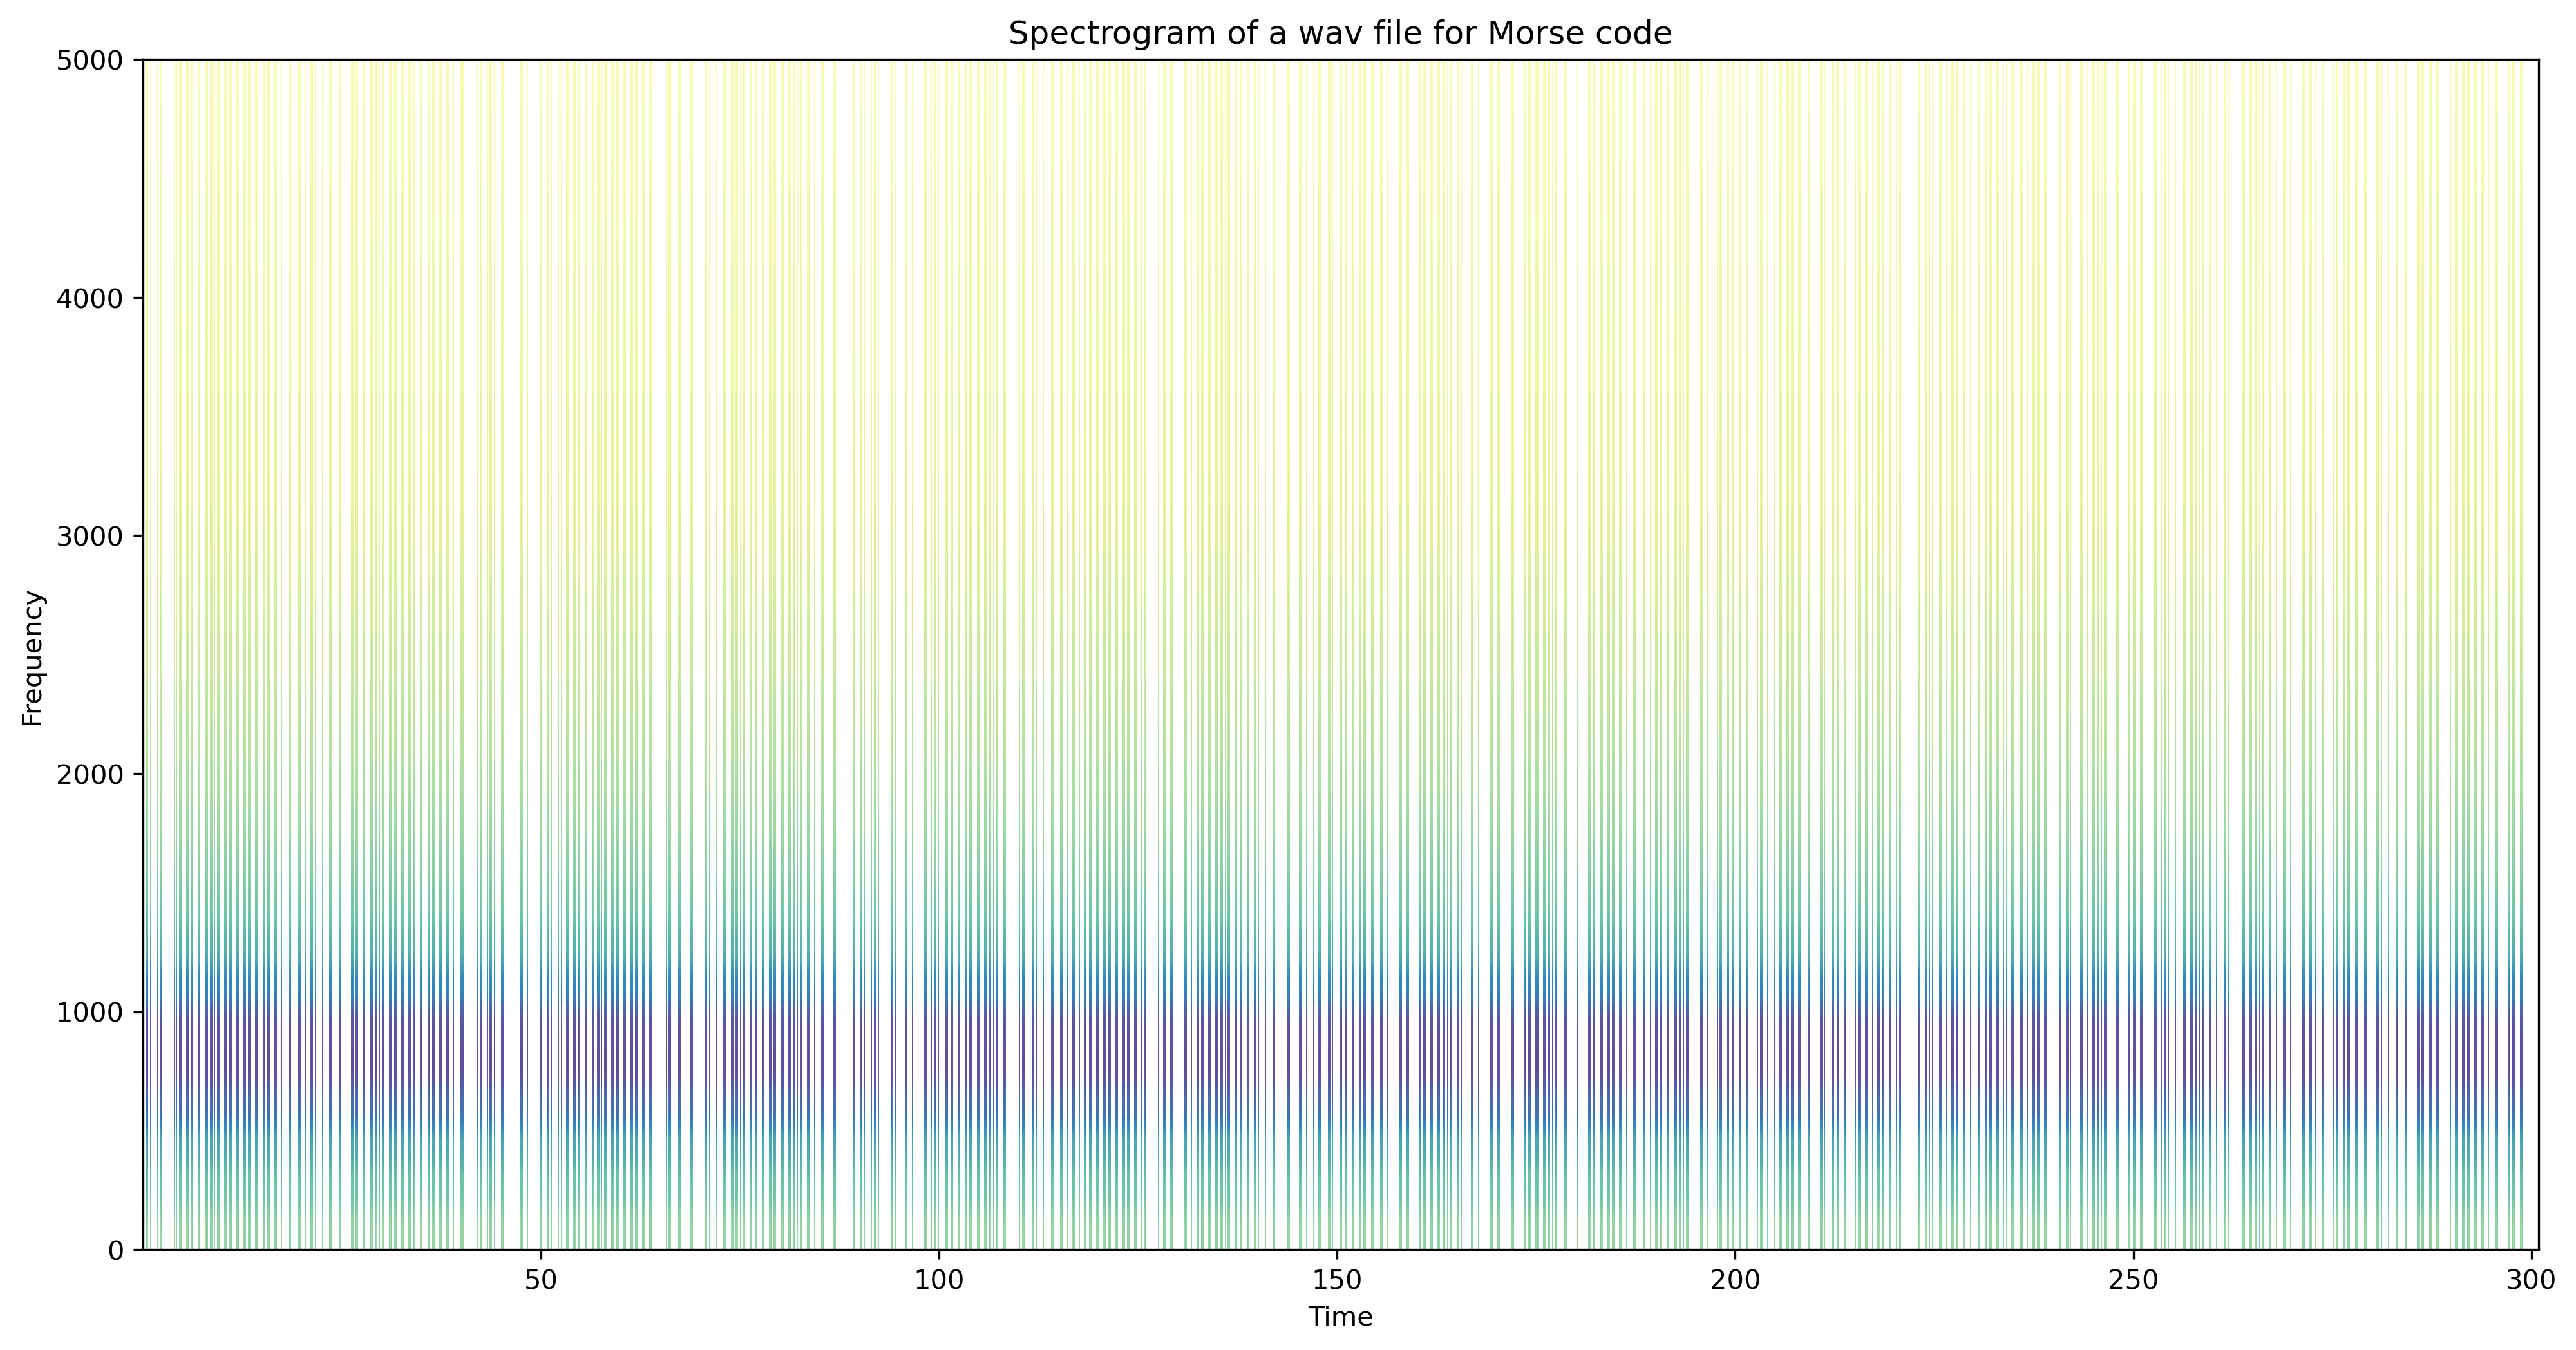

In [14]:
spectrum,freqs,t = plot_specgram(sound,samplerate)
#plot_fft(sound, samplerate, output_prg.split('.')[0])

In [ ]:
print(freqs)
print(spectrum[5,])
plt.plot(spectrum[3,])
plt.plot(spectrum[4,])
plt.plot(spectrum[5,])

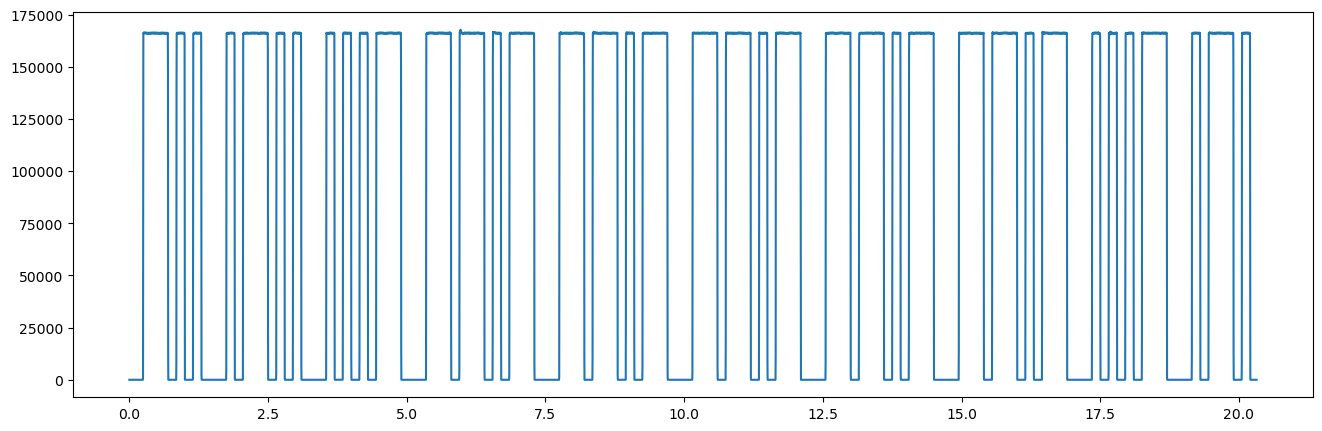

In [15]:
plt.figure(figsize=(16, 5))
plt.plot(t[:7000],spectrum[4,][:7000])


In [23]:
testval = 0.5 * spectrum[4,].max()
switchup = False
switchdown = False
firstsignal = False
signals = list()
directions = list()
for i,value in enumerate(spectrum[4,]):
    if value > testval and not switchup:
        print(t[i], 'up')
        #testval = 0.8 * value
        switchup = True
        switchdown = False
        startup = t[i]
        if firstsignal == True:
            enddown = t[i]
            signals.append(enddown - startdown)
            directions.append('down')
        if firstsignal == False:
            firstsignal = True
            t_first = t[i]
          
    if value < testval and not switchdown and firstsignal:
        print(t[i],'down')
        #testval = 0
        switchup = False
        switchdown = True
        endup = t[i]
        startdown = t[i]
        signals.append(endup - startup)
        directions.append('up')

print('\nfirst signal: ',t_first)        
print(signals)
print(directions)

0.23219954648526078 up
0.6791836734693878 down
0.8301133786848073 up
0.978140589569161 down
1.1319727891156464 up
1.28 down
1.7298866213151927 up
2.1797732426303855 down
2.330702947845805 up
2.478730158730159 down
2.6296598639455784 up
2.780589569160998 down
3.2304761904761903 up
3.680362811791383 down
3.8312925170068026 up
3.9793197278911565 down
4.1302494331065756 up
4.27827664399093 down
4.731065759637188 up
5.178049886621316 down
5.3318820861678 up
5.479909297052155 down
5.630839002267574 up
5.778866213151927 down
6.231655328798186 up
6.678639455782313 down
6.829569160997733 up
6.980498866213152 down
7.131428571428572 up
7.279455782312925 down
7.732244897959184 up
7.8802721088435375 down
8.031201814058957 up
8.478185941043083 down
8.632018140589569 up
8.780045351473923 down
8.930975056689343 up
9.079002267573696 down
9.531791383219955 up
9.679818594104308 down
9.830748299319728 up
10.28063492063492 down
10.43156462585034 up
10.579591836734695 down
10.730521541950113 up
10.878548752

177.83002267573696 up
178.27990929705214 down
178.43083900226756 up
178.57886621315194 down
178.72979591836736 up
178.88072562358278 down
179.33061224489796 up
179.47863945578231 down
179.62956916099773 up
180.07945578231292 down
180.23038548752834 up
180.3784126984127 down
180.53224489795917 up
180.68027210884352 down
181.13015873015874 up
181.58004535147393 down
181.73097505668935 up
181.8790022675737 down
182.02993197278911 up
182.17795918367347 down
182.63074829931972 up
183.0806349206349 down
183.23156462585035 up
183.3795918367347 down
183.53052154195012 up
183.67854875283447 down
184.13133786848073 up
184.27936507936508 down
184.4302947845805 up
184.88018140589568 down
185.0311111111111 up
185.17913832199545 down
185.33006802721087 up
185.47809523809525 down
185.9308843537415 up
186.07891156462586 down
186.22984126984127 up
186.67972789115646 down
186.83065759637188 up
186.97868480725623 down
187.12961451247165 up
187.28054421768707 down
187.73043083900228 up
188.18031746031747 

[0.44698413 0.14802721 0.14802721 0.44988662 0.14802721 0.15092971
 0.44988662 0.14802721 0.14802721 0.44698413 0.14802721 0.14802721
 0.44698413 0.15092971 0.14802721 0.14802721 0.44698413 0.14802721
 0.14802721 0.14802721 0.44988662 0.14802721 0.14802721 0.14802721
 0.44988662 0.14802721 0.14802721 0.14802721 0.44988662 0.14802721
 0.15092971 0.14802721 0.44698413 0.14802721 0.14802721 0.14802721
 0.14802721 0.14802721 0.44988662 0.15092971 0.14802721 0.14802721
 0.44698413 0.14802721 0.14802721 0.15092971 0.44698413 0.14802721
 0.14802721 0.15092971 0.44698413 0.14802721 0.14802721 0.14802721
 0.44988662 0.14802721 0.44988662 0.14802721 0.14802721 0.14802721
 0.44698413 0.14802721 0.14802721 0.15092971 0.44698413 0.15092971
 0.14802721 0.14802721 0.44698413 0.14802721 0.14802721 0.14802721
 0.44988662 0.14802721 0.14802721 0.14802721 0.14802721 0.14802721
 0.44698413 0.14802721 0.15092971 0.14802721 0.44988662 0.14802721
 0.14802721 0.14802721 0.44988662 0.15092971 0.14802721 0.1480

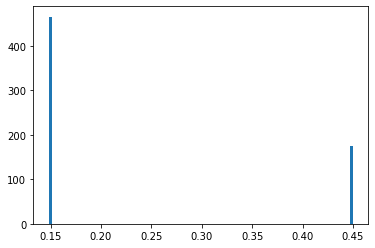

In [36]:
plt.hist(signals[directions == 'up'],bins=100)
print(signals[directions == 'up'])

In [34]:
directions = np.array(directions)
signals = np.array(signals)
shortsignal = ( signals[directions == 'up'].min() + signals[directions == 'down'].min() ) / 2

print('\nestimated duration of dit: {:.3f} seconds\n'.format(shortsignal))
wpm = (60/shortsignal)/50
print('estimated wpm: {:.2f}\n'.format(wpm))

morsecode = ''
for j,signal in enumerate(signals):
    print(signal, directions[j])
    if signal < 1.2 * shortsignal and signal > 0.8 * shortsignal and directions[j] == 'up':
        morsecode += '.'
    elif signal < 1.2 * shortsignal and signal > 0.8 * shortsignal and directions[j] == 'down':
        morsecode += ''
    elif signal < 1.2 * shortsignal * 3 and signal > 0.8 * shortsignal * 3 and directions[j] == 'up':
        morsecode += '-'
    elif signal < 1.2 * shortsignal * 3 and signal > 0.8 * shortsignal * 3 and directions[j] == 'down':
        morsecode += ' '
    elif signal < 1.2 * shortsignal * 7 and signal > 0.8 * shortsignal * 7 and directions[j] == 'down':
        morsecode += ' / '
        
print(morsecode)


estimated duration of dit: 0.149 seconds

estimated wpm: 8.03

0.44698412698412704 up
0.15092970521541949 down
0.14802721088435367 up
0.15383219954648542 down
0.14802721088435367 up
0.44988662131519264 down
0.44988662131519286 up
0.15092970521541949 down
0.1480272108843539 up
0.15092970521541949 down
0.15092970521541949 up
0.4498866213151924 down
0.44988662131519286 up
0.15092970521541949 down
0.1480272108843539 up
0.15092970521541904 down
0.14802721088435433 up
0.452789115646258 down
0.4469841269841277 up
0.15383219954648464 down
0.14802721088435433 up
0.15092970521541904 down
0.14802721088435344 up
0.4527891156462589 down
0.4469841269841268 up
0.15092970521541993 down
0.15092970521541904 up
0.15092970521541993 down
0.14802721088435344 up
0.4527891156462589 down
0.14802721088435344 up
0.15092970521541904 down
0.4469841269841268 up
0.15383219954648553 down
0.14802721088435433 up
0.15092970521541993 down
0.14802721088435256 up
0.4527891156462598 down
0.14802721088435256 up
0.1509297052

0.15383219954648553 down
0.14802721088435078 up
0.4498866213151871 down
0.14802721088435078 up
0.15383219954648553 down
0.4469841269841197 up
0.15092970521541815 down
0.15092970521541815 up
0.15092970521541815 down
0.1480272108843792 up
0.4498866213151871 down
0.15092970521541815 up
0.15092970521541815 down
0.4469841269841197 up
0.15383219954648553 down
0.14802721088435078 up
0.15092970521541815 down
0.14802721088435078 up
0.45278911564625446 down
0.1480272108843792 up
0.15092970521541815 down
0.14802721088435078 up
0.15092970521541815 down
0.15092970521541815 up
0.15092970521541815 down
0.4469841269841197 up
0.45278911564625446 down
0.14802721088435078 up
0.15092970521541815 down
0.1480272108843792 up
0.15092970521541815 down
0.15092970521541815 up
0.15092970521541815 down
0.4469841269841197 up
0.45278911564625446 down
0.14802721088435078 up
0.15092970521541815 down
0.4498866213151871 up
0.15092970521541815 down
0.1480272108843792 up
0.15092970521541815 down
0.15092970521541815 up
0.4

In [28]:
words = morsecode.split(' / ')
morse_message = ''
for word in words:
    letters = word.split(' ')
    for letter in letters:
        print(letter, morse_code_rev[letter])
        morse_message += morse_code_rev[letter]
    morse_message += ' '

print('\n' + morse_message)

-.. D
-.. D
-.. D
-.. D
-.. D
.-.. L
.-.. L
.-.. L
.-.. L
.-.. L
...- V
...- V
...- V
...- V
...- V
.-.. L
.-.. L
.-.. L
.-.. L
.-.. L
...- V
...- V
...- V
...- V
...- V
-.. D
-.. D
-.. D
-.. D
-.. D
.-.. L
.-.. L
.-.. L
.-.. L
-.. D
-.. D
-.. D
-.. D
...- V
...- V
...- V
...- V
-.. D
-.. D
-.. D
-.. D
.-.. L
.-.. L
.-.. L
.-.. L
...- V
...- V
...- V
...- V
-.. D
-.. D
-.. D
...- V
...- V
...- V
.-.. L
.-.. L
.-.. L
-.. D
-.. D
-.. D
.-.. L
.-.. L
.-.. L
...- V
...- V
...- V
-.. D
-.. D
-.. D
...- V
...- V
...- V
.-.. L
.-.. L
.-.. L
.-.. L
.-.. L
...- V
...- V
-.. D
-.. D
.-.. L
.-.. L
-.. D
-.. D
...- V
...- V
.-.. L
.-.. L
...- V
...- V
-.. D
-.. D
.-.. L
.-.. L
...- V
...- V
.-.. L
.-.. L
-.. D
-.. D
.-.. L
.-.. L
-.. D
-.. D
...- V
...- V
-.. D
.-.. L
...- V
.-.. L
-.. D
...- V
.-.. L
-.. D
...- V
-.. D
.-.. L
-.. D
...- V
.-.. L
-.. D
.-.. L
...- V
.-.. L
-.. D
...- V
.-.. L
...- V
-.. D
.-.. L
-.. D
...- V
.-.. L
...- V
-.. D
...- V
.-.. L
...- V
.-.. L
-.. D
.-.. L
...- V
-.. D

In [ ]:
morse_code = {'A': '.-',
              'B': '-...',
              'C': '-.-.',
              'D': '-..',
              'E': '.',
              'F':'..-.',
              'G': '--.',
              'H':'....',
              'I':'..',
              'J':'.---',
              'K':'-.-',
              'L':'.-..',
              'M':'--',
              'N':'-.',
              'O':'---',
              'P':'.--.',
              'Q':'--.-',
              'R':'.-.',
              'S':'...',
              'T':'-',
              'U':'..-',
              'V':'...-',
              'W':'.--',
              'X':'-..-',
              'Y':'-.--',
              'Z':'--..',
              '1':'.----',
              '2':'..---',
              '3':'...--',
              '4':'....-',
              '5':'.....',
              '6':'-....',
              '7':'--...',
              '8':'---..',
              '9':'----.',
              '0':'-----',
              '?':'..--..',
              '/':'-..-.',
              '=':'-...-',
              '-':'-....-',
              '_':'..--.-',
              '.':'.-.-.-',
              ',':'--..--',
              '(':'-.--.',
              ')':'-.--.-',
              ':':'---...',
              '"':'.-..-.',
              "'":'.----.',
              '@':'.--.-.',
              '$':'...-..-',
              'error':'........',
              'end of work':'...-.-',
              'starting signal':'-.-.-',
              'new page signal':'.-.-.',
              'understood':'...-.',
              'wait':'',

             }



In [27]:
morse_code_rev = {
                  '.-':    'A',
                  '-...':  'B',
                  '-.-.':  'C',
                  '-..':   'D',
                  '.':     'E',
                  '..-.':  'F',
                  '--.':   'G',
                  '....':  'H',
                  '..':    'I',
                  '.---':  'J',
                  '-.-':   'K',
                  '.-..':  'L',
                  '--':    'M',
                  '-.':    'N',
                  '---':   'O',
                  '.--.':  'P',
                  '--.-':  'Q',
                  '.-.':   'R',
                  '...':   'S',
                  '-':     'T',
                  '..-':   'U',
                  '...-':  'V',
                  '.--':   'W',
                  '-..-':  'X',
                  '-.--':  'Y',
                  '--..':  'Z',
                  '.----': '1',
                  '..---': '2',
                  '...--': '3',
                  '....-': '4',
                  '.....': '5',
                  '-....': '6',
                  '--...': '7',
                  '---..': '8',
                  '----.': '9',
                  '-----': '0',
                  '..--..':'?',
                  '-..-.': '/',
                  '-...-': '=',
                  '-....-':'-',
                  '..--.-':'_',
                  '.-.-.-':'.',
                  '--..--':',',
                  '-.--.': '(',
                  '-.--.-':')',
                  '---...':':',
                  '.-..-.':'"',
                  '.----.':"'",
                  '.--.-.':'@',
                  '...-..-':'$',
                  '........':'error',
                  '...-.-':'end of work',
                  '-.-.-':'starting signal',
                  '.-.-.':'new page signal',
                  '...-.':'understood'
                 }



peak frequency is at: 746.67 Hz.


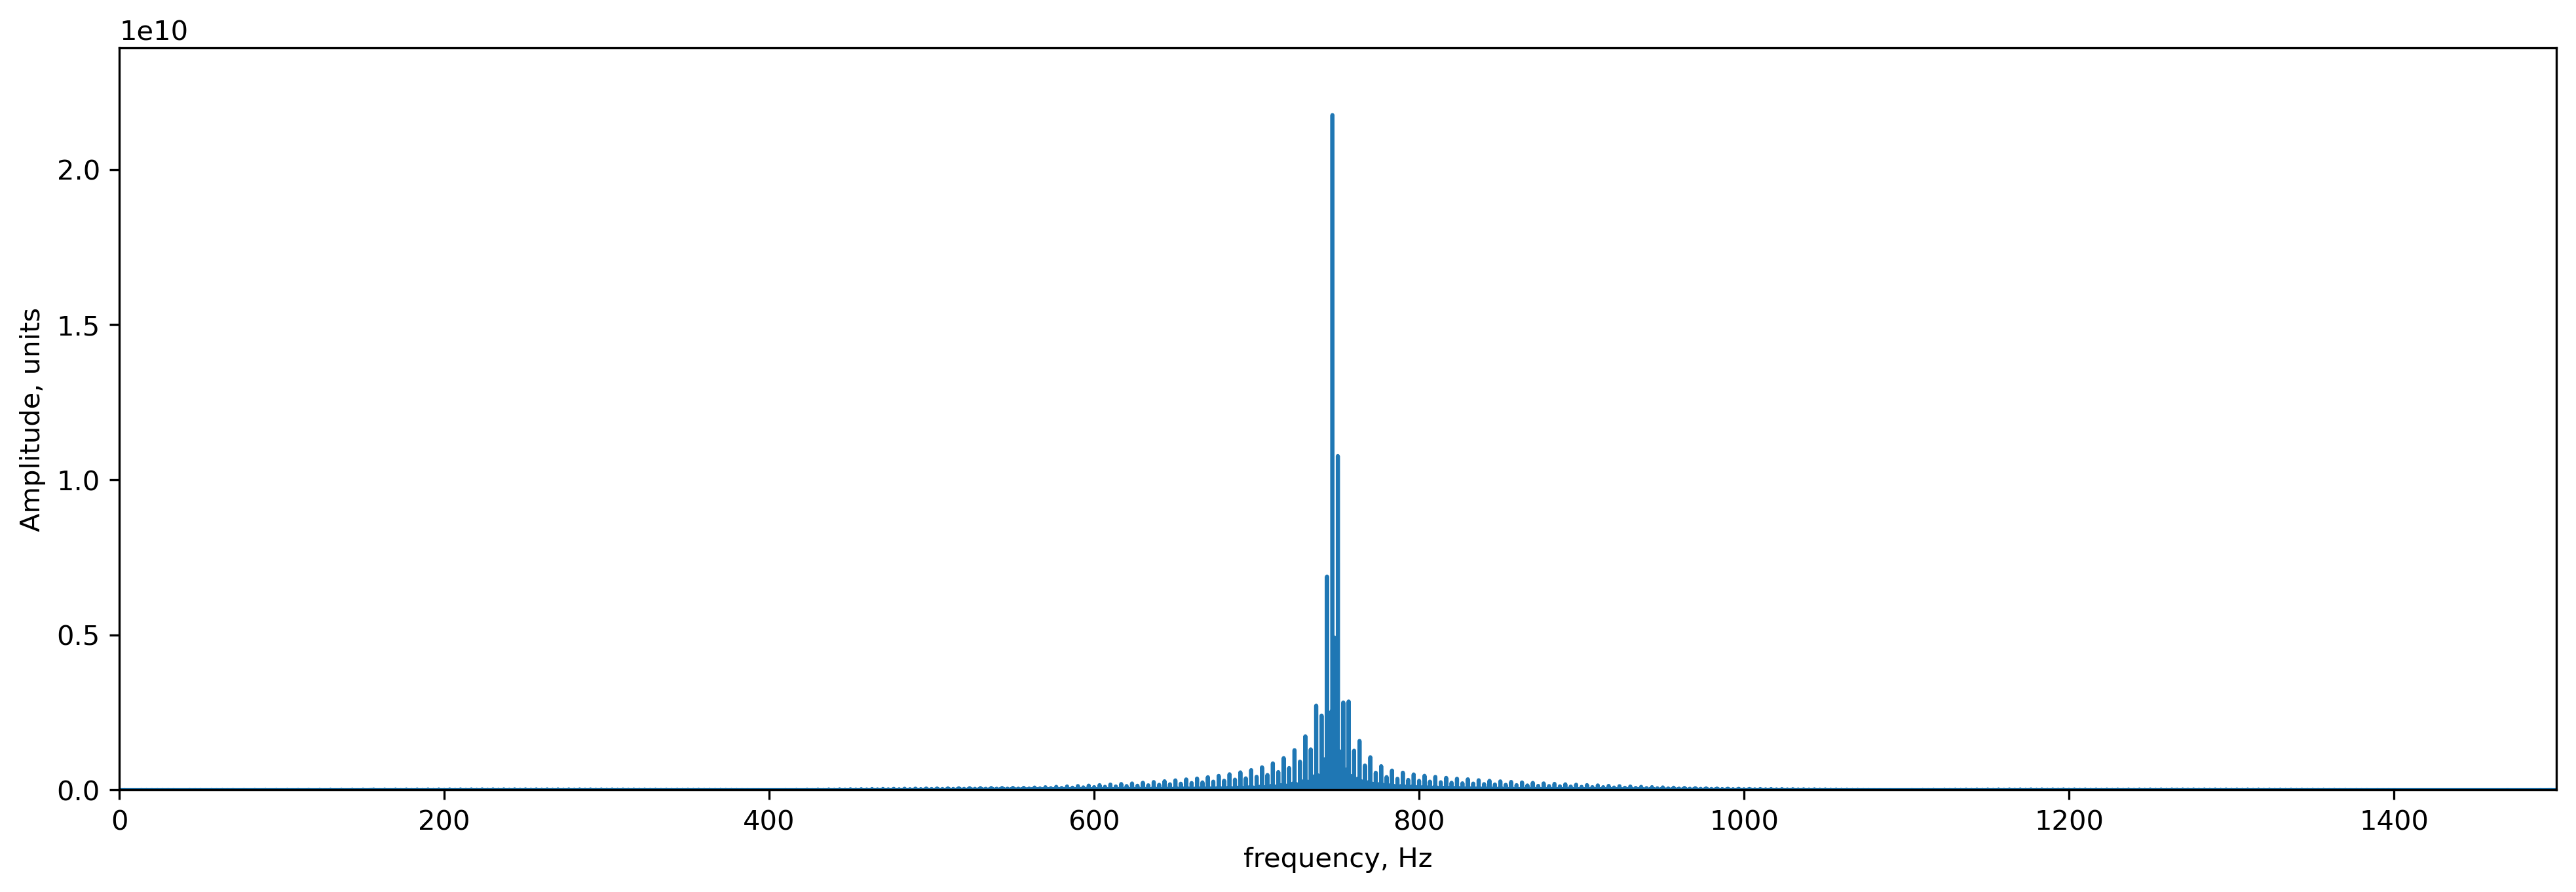

In [13]:
plot_fft(sound, samplerate)

In [14]:
plot_waves(time,sound,'waves')

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 4800x1500 with 1 Axes>

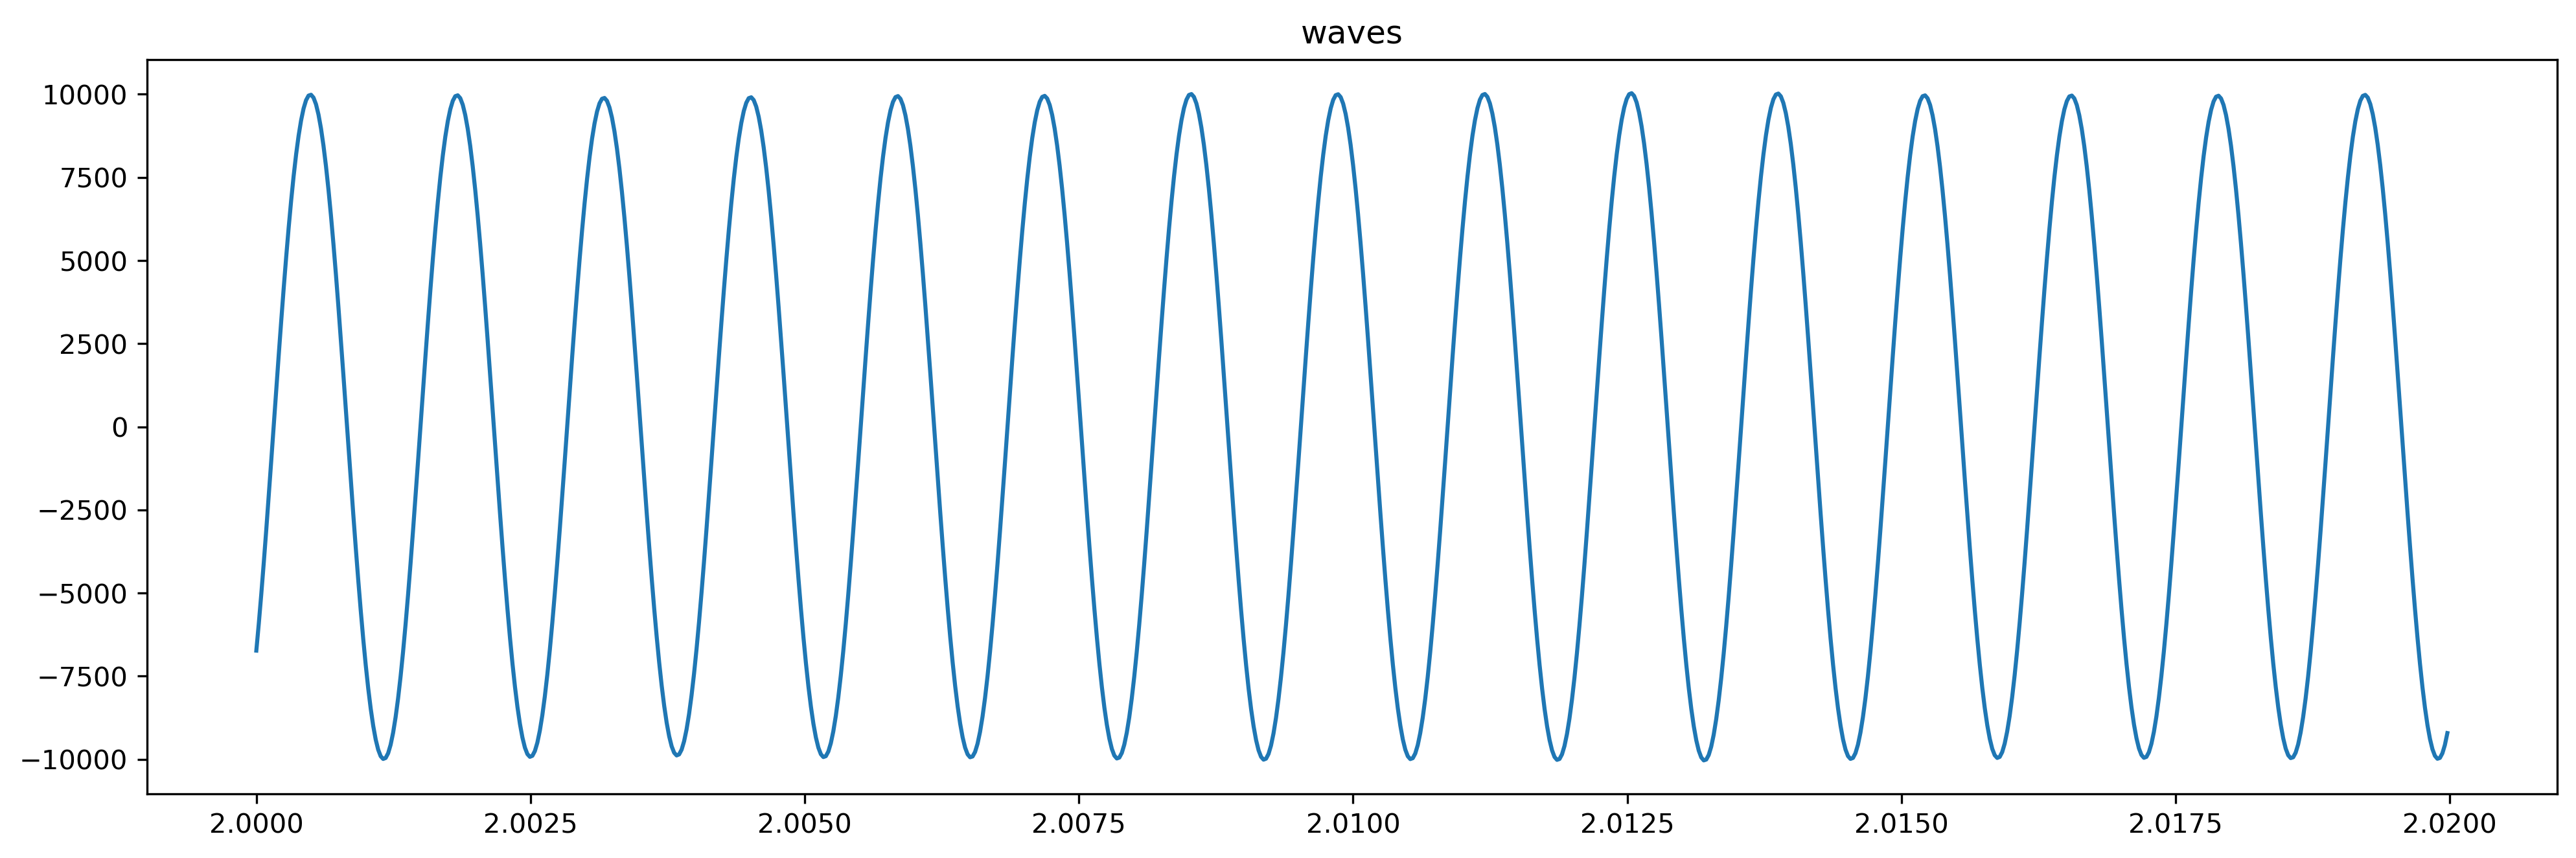

In [15]:
plot_start(2,time,sound,'waves')

In [ ]:
%%bash
i=0
for MP3 in $MP3S; do echo $MP3; ((i+=1)); ffmpeg -i $MP3 Morse_cursus_wav/Morse_les_${i}.wav; done
